In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X, y, coef = datasets.make_regression(n_samples=5, n_features=2, n_informative=2, n_targets=1, noise=5, coef=True, random_state=3)

In [3]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)


In [24]:
def gd_stch(data,target):

    w = np.zeros(2)

    w_list = [w.copy()]
 
    errors = []
 
    eta = 0.5
 
    max_iter = 1e5
 
    min_weight_dist = 1e-5
 
    weight_dist = np.inf
 
    iter_num = 0
    
    tol = 1e-5
 
    np.random.seed(1234)
 
    while weight_dist > min_weight_dist and iter_num < max_iter:
    
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        
        current_error = mserror(data, new_w, target)
        
        errors.append(current_error)
        
        if iter_num > 2 and np.abs(current_error - errors[-2]) < tol:
            break
        
        iter_num += 1
        w = new_w
        

    
    w_list = np.array(w_list)
 
   
    return w_list, errors

In [51]:
def gd(X,y, learning_rate=0.001, iterations=1e5):
    w = np.zeros(X.shape[1])
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num =0
    tol = 1e-5
    
    
    while weight_dist > min_weight_dist and iter_num < iterations:
        new_w = w - 2 * learning_rate * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        
        current_error = mserror(X, new_w, y)
        
        errors.append(current_error)
    
        iter_num += 1
            
        w = new_w
        # остановим обучение, если ошибка падает меньше 0.0001
        if len(errors)>2 and np.abs(current_error - errors[-2]) < tol:
            break
    
    w_list = np.array(w_list)

    return w_list, errors

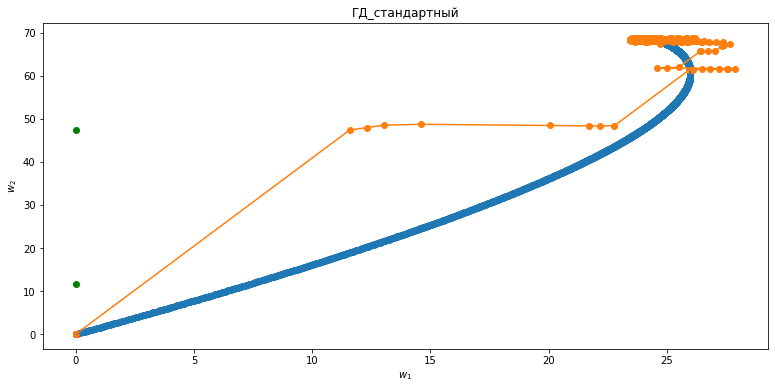

In [52]:
plt.figure(figsize=(13, 6))
plt.title('Сравнение ГД_стд и ГД_Стх')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

#  Точки  -  начальные веса


plt.scatter(gd(X,y)[0][:, 0], gd(X,y)[0][:, 1])
plt.scatter(gd(X,y)[0][0], gd(X,y)[0][1], c='r')
plt.plot(gd(X,y)[0][:, 0], gd(X,y)[0][:, 1])
plt.scatter(gd_stch(X,y)[0][:, 0], gd_stch(X,y)[0][:, 1])
plt.scatter(gd_stch(X,y)[0][0], gd_stch(X,y)[0][1], c='g')
plt.plot(gd_stch(X,y)[0][:, 0], gd_stch(X,y)[0][:, 1])

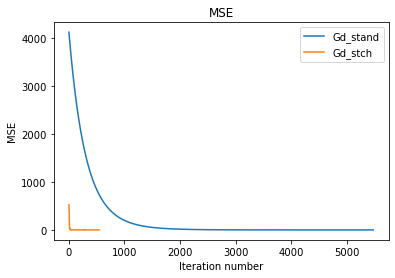

In [53]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(gd(X,y)[1])), gd(X,y)[1])
plt.plot(range(len(gd_stch(X,y)[1])), gd_stch(X,y)[1])

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.legend(["Gd_stand", "Gd_stch"])


In [54]:
gd_stch(X,y)[1][-1], gd(X,y)[1][-1]

(7.233259651791128, 7.2165054199129015)

In [55]:
gd_stch(X,y)[0][-1], gd(X,y)[0][-1]

(array([24.52092428, 68.53365025]), array([24.66691901, 68.30083561]))